In [1]:
#!pip install pandas-datareader

In [2]:
'''
!pip install lxml
import pandas_datareader as pdr
import pandas as pd
'''

'\n!pip install lxml\nimport pandas_datareader as pdr\nimport pandas as pd\n'

In [3]:
#!pip install --upgrade pandas-datareader
#!pip install --upgrade pandas

In [4]:
#import os
#os.environ['TIINGO_API_KEY'] = "12120b99ae7c071a2f7950b0482156305c1ea537"

In [5]:
#df = pdr.get_data_tiingo(symbols='AAPL')

In [6]:
#!pip install --upgrade pandas-datareader

In [7]:
#!pip install --upgrade pandas

In [8]:
#!pip install pandas-datareader==0.10.0

## STARTING END-TO-END PROJECT ON APPLE DATA.

## Importing necessary packages.

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
from datetime import datetime
from numpy import log
from pandas import Series

## Loading Apple share price dataset

In [11]:
df = pd.read_csv('/content/Apple.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1
1254,1254,AAPL,2020-05-19,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1
1255,1255,AAPL,2020-05-20,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1
1256,1256,AAPL,2020-05-21,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1


### Necessary EDA and FE.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 147.6+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1258 non-null   int64         
 1   symbol       1258 non-null   object        
 2   date         1258 non-null   datetime64[ns]
 3   close        1258 non-null   float64       
 4   high         1258 non-null   float64       
 5   low          1258 non-null   float64       
 6   open         1258 non-null   float64       
 7   volume       1258 non-null   int64         
 8   adjClose     1258 non-null   float64       
 9   adjHigh      1258 non-null   float64       
 10  adjLow       1258 non-null   float64       
 11  adjOpen      1258 non-null   float64       
 12  adjVolume    1258 non-null   int64         
 13  divCash      1258 non-null   float64       
 14  splitFactor  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
m

In [14]:
df.describe()
# the quartile values of the column to be forecasted are used to make insights, for eg: when to buy/sell shares

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,2017-11-22 14:13:55.612082688,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
min,0.000000,2015-05-27 00:00:00,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,2016-08-23 06:00:00,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,2017-11-20 12:00:00,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,2019-02-24 06:00:00,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,2020-05-22 00:00:00,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337148,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0
std,363.297628,NaN,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0


In [15]:
df.isnull().sum()     #no missing data: necessary for Time series

,0
Unnamed: 0,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0


In [16]:
# we only need the necessary columns: 'date' and 'close'
ds = df[['date','close']]
ds

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [17]:
#setting date column as index
ds.set_index('date', inplace = True)
ds.head()

,close
date,
2015-05-27,132.045
2015-05-28,131.780
2015-05-29,130.280
2015-06-01,130.535
2015-06-02,129.960


In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


## Plot to see the Trend in dataset

<Axes: xlabel='date'>

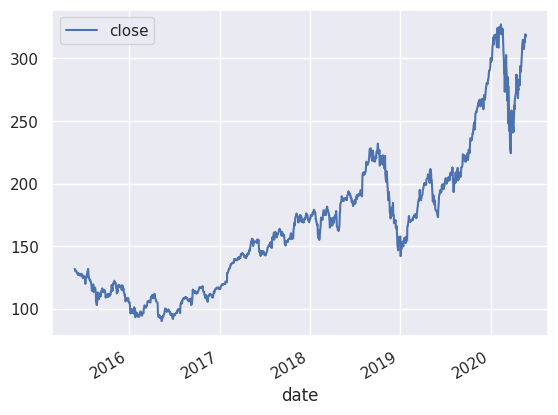

In [19]:
ds.plot()
#somewhat upward trend

## Decomposition method to check all three components in the dataset:
### -- trend, seasonality, noise

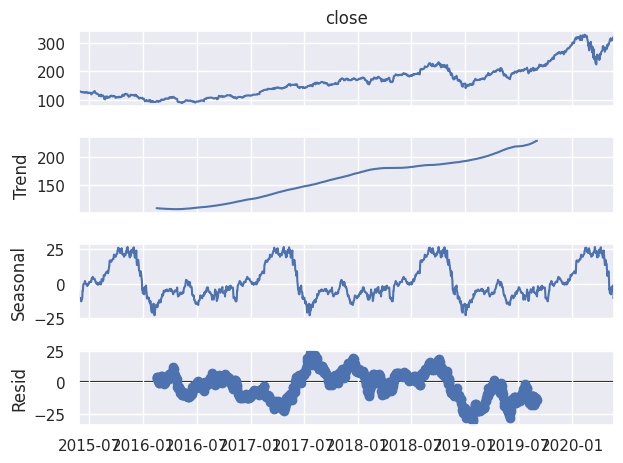

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ds['close'], period = 365)
decompose.plot()
plt.show()

## Check Auto-Correlation using Durbin-Watson Test

In [21]:
import statsmodels.api as sm
sm.stats.durbin_watson(ds)

array([0.00042847])

In [22]:
# HIGHLY POSITIVE AUTO-CORRELATION FOUND!!

### CHECKING WHETHER DATA IS STATIONARY OR NOT USING AUGMENTED DICKEY FULLER TEST METHOD

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adf_check(timeseries):
  result = adfuller(timeseries)
  print('Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary')
  print('---------------------------------------------------------------------------------')
  labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'Number of observations used']

  for a, b in zip(result, labels):
    print(b + ' : ' +str(a))
    print('-----------')

  if result[1] <= 0.05:
    print('Strong evidence against Null hypothesis and my time series is Stationary.')
  else:
    print('Weak evidence against Null hypothesis and my time series is Non-stationary.')

adf_check(ds['close'])

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -0.10012966467734342
-----------
p-value : 0.9494256168598446
-----------
#Lags used : 18
-----------
Number of observations used : 1239
-----------
Weak evidence against Null hypothesis and my time series is Non-stationary.


## Making data stationary using Lag Function !!

In [25]:
ds['1st diff'] = ds['close'] - ds['close'].shift(1)
ds

,close,1st diff
date,,
2015-05-27,132.045,NaN
2015-05-28,131.780,-0.265
2015-05-29,130.280,-1.500
2015-06-01,130.535,0.255
2015-06-02,129.960,-0.575
...,...,...
2020-05-18,314.960,7.250
2020-05-19,313.140,-1.820
2020-05-20,319.230,6.090


In [26]:
# Checking again whether data is stationary or non-stationary
adf_check(ds['1st diff'].dropna())

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -6.239529846021872
-----------
p-value : 4.734448928661209e-08
-----------
#Lags used : 17
-----------
Number of observations used : 1239
-----------
Strong evidence against Null hypothesis and my time series is Stationary.


### data is now stationary, therefore we get d = 1.

## To find D for Seasonality,
### our seasonality period is 30 days, therefore you compare the first month data with the second, the second month with the third and so on..

In [27]:
# Checking if Seasonality data is Stationary or not:
ds['30d diff'] = ds['close'] - ds['close'].shift(30)
ds.head(50)

,close,1st diff,30d diff
date,,,
2015-05-27,132.045,NaN,NaN
2015-05-28,131.780,-0.265,NaN
2015-05-29,130.280,-1.500,NaN
2015-06-01,130.535,0.255,NaN
2015-06-02,129.960,-0.575,NaN
2015-06-03,130.120,0.160,NaN
2015-06-04,129.360,-0.760,NaN
2015-06-05,128.650,-0.710,NaN
2015-06-08,127.800,-0.850,NaN


In [28]:
adf_check(ds['30d diff'].dropna())

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -7.144467547383237
-----------
p-value : 3.2598157052340997e-10
-----------
#Lags used : 22
-----------
Number of observations used : 1205
-----------
Strong evidence against Null hypothesis and my time series is Stationary.


## Both Trend and Seasonality are STATIONARY !!
### Trend, d = 1.
### Seasonality, D = 1.

### For p, q, P and Q: we will check Partial Auto-Correlation and Auto-Correlation using visalization method.

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

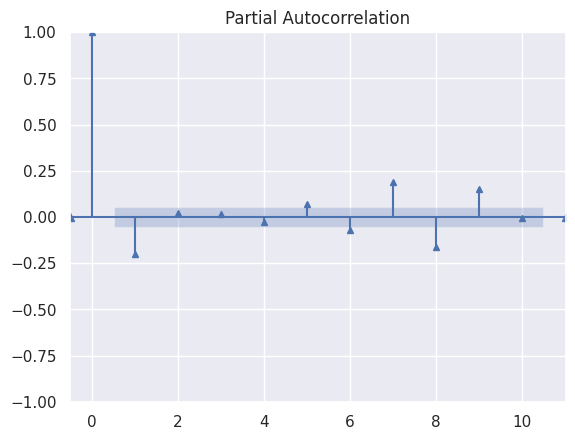

In [30]:
# First target: Trend
# p = partial auto-correlation = ?
# q = auto-correlation = ?
# d = difference = 1

plot_pacf(ds['1st diff'].dropna(), lags = 10, marker = '^')
plt.show()

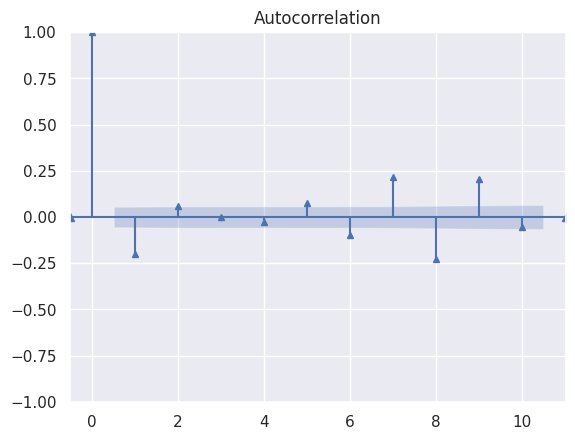

In [31]:
plot_acf(ds['1st diff'].dropna(), lags = 10, marker = '^')
plt.show()


## First target: Trend
## p = partial auto-correlation = 1
## q = auto-correlation = 2
## d = difference = 1

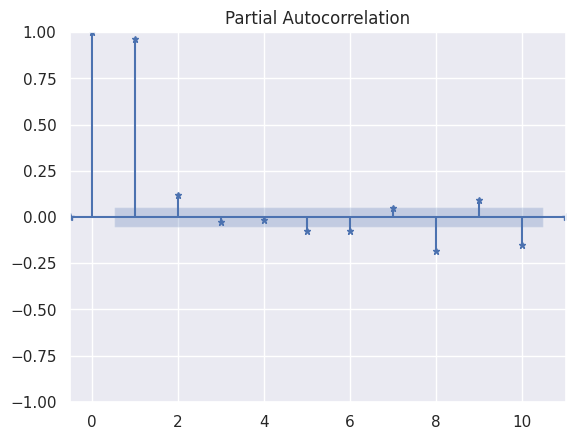

In [32]:
# Second Target : trend
# P = partial auto-correlation = ?
# Q = auto-correlation = ?
# D = difference = 1

plot_pacf(ds['30d diff'].dropna(), lags = 10, marker = '*')
plt.show()

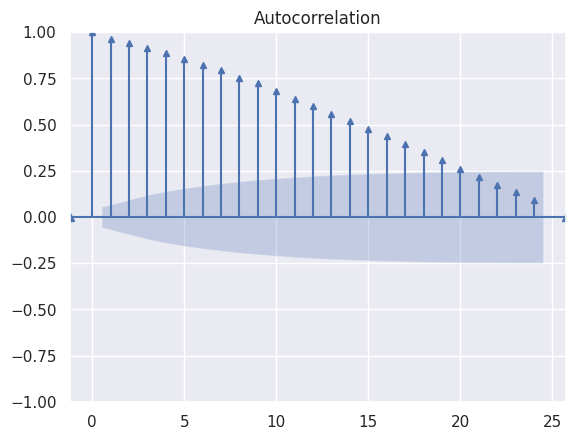

In [33]:
plot_acf(ds['30d diff'].dropna(), lags = 24, marker = '^')
plt.show()

## Second target: Seasonality
## P = partial auto-correlation = 2
## Q = auto-correlation = 20
## D = difference = 1



## Building the Time Series Forecasting with ARIMA Model
### Auto-Regressive Integrated Moving Average Model

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [35]:
model = sm.tsa.statespace.SARIMAX(ds['close'],
                                  order = (1, 1, 2),
                                  seasonal_order = (2, 1, 5, 365))
# max nputs for ARIMA model can be 5.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
#result = model.fit()
#print(result.aic)



## Machine is suggesting that we can check with:


In [37]:
import itertools

In [38]:
p = d = q = range(1,3)
pdq = list(itertools.product(p, d, q))    # trend
seasonal_pdq = [(x[0], x[1], x[2], 365) for x in pdq]

print('Check few samples for understanding purpose:')
print('{} × {}'.format(pdq[0], seasonal_pdq[0]))
print('{} × {}'.format(pdq[1], seasonal_pdq[1]))

Check few samples for understanding purpose:
(1, 1, 1) × (1, 1, 1, 365)
(1, 1, 2) × (1, 1, 2, 365)


In [39]:
'''
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(ds['close'],
                                        order = param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility = False)
      results = model.fit()
      print('ARIMA{} × {} - AIC: {}'.format(param, param_seasonal, results.aic))
    except:
      continue
      '''

"\nfor param in pdq:\n  for param_seasonal in seasonal_pdq:\n    try:\n      model = sm.tsa.statespace.SARIMAX(ds['close'],\n                                        order = param,\n                                        seasonal_order = param_seasonal,\n                                        enforce_stationarity = False,\n                                        enforce_invertibility = False)\n      results = model.fit()\n      print('ARIMA{} × {} - AIC: {}'.format(param, param_seasonal, results.aic))\n    except:\n      continue\n      "

## USING FACEBOOK PROPHET MODEL

In [40]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.8 MB/s eta 0:00:00


In [41]:
!python -m pip install prophet

In [42]:
import prophet

In [43]:
df = df[['date', 'close']]

In [44]:
# FACEBOOK PROPHET MODEL
df_prophet = df.rename(columns = {'date': 'ds', 'close': 'y'})
df_prophet.head()

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960


In [45]:
from prophet import Prophet

In [46]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/hn2d5o45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/_az87m64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70482', 'data', 'file=/tmp/tmpwvkabcas/hn2d5o45.json', 'init=/tmp/tmpwvkabcas/_az87m64.json', 'output', 'file=/tmp/tmpwvkabcas/prophet_modelzkr1k5ys/prophet_model-20250211074402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [48]:
#Build Time Series Forecasting Model
future_price = model.make_future_dataframe(periods = 365, freq = 'D')
future_price

,ds
0,2015-05-27
1,2015-05-28
2,2015-05-29
3,2015-06-01
4,2015-06-02
...,...
1618,2021-05-18
1619,2021-05-19
1620,2021-05-20
1621,2021-05-21


In [49]:
df_prophet.shape

(1258, 2)

In [50]:
future_price.shape

(1623, 1)

In [51]:
prediction = model.predict(future_price)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,132.621686,113.649532,145.516905,132.621686,132.621686,-2.165517,-2.165517,-2.165517,0.705479,0.705479,0.705479,-2.870995,-2.870995,-2.870995,0.0,0.0,0.0,130.456169
1,2015-05-28,132.475593,114.329137,145.818459,132.475593,132.475593,-2.500292,-2.500292,-2.500292,0.602978,0.602978,0.602978,-3.103270,-3.103270,-3.103270,0.0,0.0,0.0,129.975301
2,2015-05-29,132.329501,112.810235,144.999453,132.329501,132.329501,-3.032243,-3.032243,-3.032243,0.302443,0.302443,0.302443,-3.334686,-3.334686,-3.334686,0.0,0.0,0.0,129.297257
3,2015-06-01,131.891223,112.464214,143.230173,131.891223,131.891223,-3.849896,-3.849896,-3.849896,0.148986,0.148986,0.148986,-3.998882,-3.998882,-3.998882,0.0,0.0,0.0,128.041327
4,2015-06-02,131.745131,113.269256,143.411696,131.745131,131.745131,-3.652169,-3.652169,-3.652169,0.551342,0.551342,0.551342,-4.203512,-4.203512,-4.203512,0.0,0.0,0.0,128.092962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,418.860892,358.141444,469.116377,361.143968,469.598138,-0.721839,-0.721839,-0.721839,0.551342,0.551342,0.551342,-1.273181,-1.273181,-1.273181,0.0,0.0,0.0,418.139053
1619,2021-05-19,419.167229,356.885790,471.928866,361.286683,470.066695,-0.691448,-0.691448,-0.691448,0.705479,0.705479,0.705479,-1.396927,-1.396927,-1.396927,0.0,0.0,0.0,418.475781
1620,2021-05-20,419.473566,355.778385,474.785014,361.429399,470.620573,-0.939983,-0.939983,-0.939983,0.602978,0.602978,0.602978,-1.542961,-1.542961,-1.542961,0.0,0.0,0.0,418.533583
1621,2021-05-21,419.779903,357.981399,471.116189,361.572114,471.330460,-1.406867,-1.406867,-1.406867,0.302443,0.302443,0.302443,-1.709309,-1.709309,-1.709309,0.0,0.0,0.0,418.373036


In [52]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [53]:
prediction[['ds', 'yhat_lower', 'yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
1603,2021-05-03,354.983283,460.510618,412.429651
1604,2021-05-04,357.262840,461.627308,413.269457
1605,2021-05-05,357.043358,462.614327,413.861725
1606,2021-05-06,357.491466,466.413144,414.194812
1607,2021-05-07,358.235432,462.831977,414.324005
1608,2021-05-08,356.886903,463.314082,413.286501
1609,2021-05-09,355.190441,463.955080,413.694670
1610,2021-05-10,358.438442,468.167999,415.392029
1611,2021-05-11,355.431111,468.485004,416.168989
1612,2021-05-12,356.111755,469.704096,416.677176


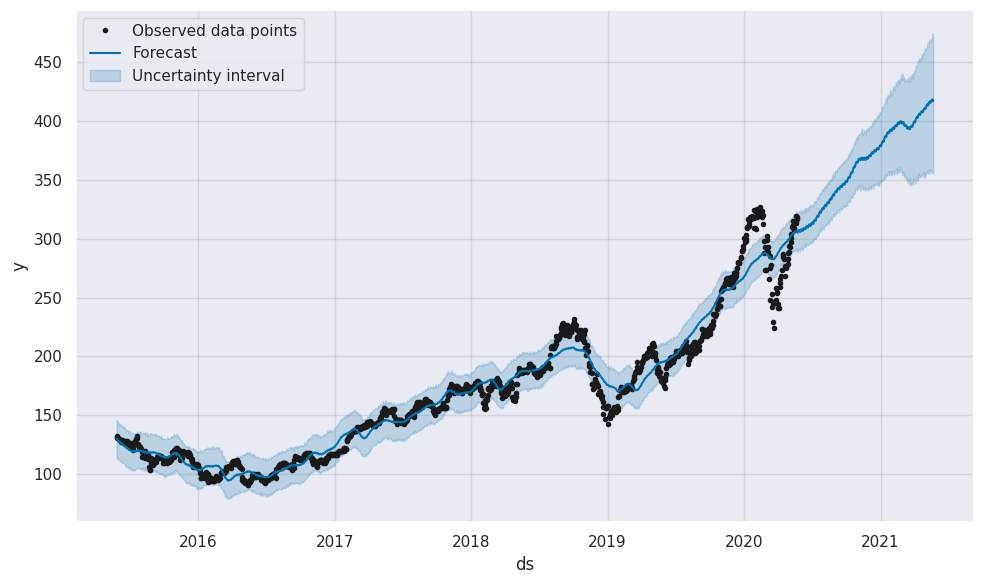

In [54]:
model.plot(prediction, include_legend = True)
plt.show()

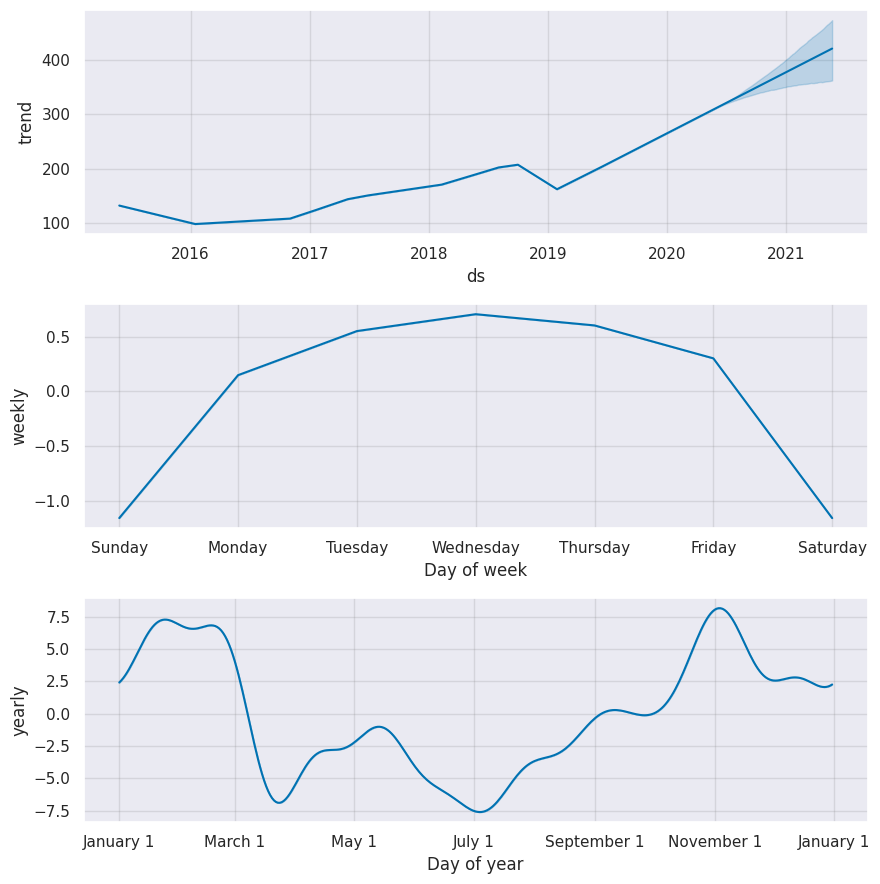

In [55]:
model.plot_components(prediction)
plt.show()

In [56]:
# cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '100 days', period = '50 days', initial = '300 days')

INFO:prophet:Making 29 forecasts with cutoffs between 2016-04-13 00:00:00 and 2020-02-12 00:00:00


  0%|          | 0/29 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/9z1vbvay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/f8hmbg6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66052', 'data', 'file=/tmp/tmpwvkabcas/9z1vbvay.json', 'init=/tmp/tmpwvkabcas/f8hmbg6b.json', 'output', 'file=/tmp/tmpwvkabcas/prophet_model_svd7o2p/prophet_model-20250211074405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/tmhwh3jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/f314jo7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [57]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,280.505214,16.748290,12.021176,0.068235,0.049637,0.067147,0.325000
1,11 days,288.838475,16.995249,12.352033,0.070050,0.054986,0.069211,0.320000
2,12 days,280.152478,16.737756,12.245383,0.069799,0.060181,0.069198,0.336190
3,13 days,293.308718,17.126258,12.604368,0.071541,0.063307,0.071077,0.346316
4,14 days,319.215257,17.866596,13.311463,0.075434,0.067695,0.074828,0.341750
...,...,...,...,...,...,...,...,...
86,96 days,1554.881647,39.431988,30.526010,0.162033,0.129334,0.164255,0.126000
87,97 days,1440.663818,37.956077,29.429125,0.156156,0.129334,0.158897,0.135000
88,98 days,1385.850740,37.227016,28.914824,0.152491,0.130177,0.155181,0.139737
89,99 days,1465.954255,38.287782,29.717478,0.155831,0.135934,0.158066,0.147143


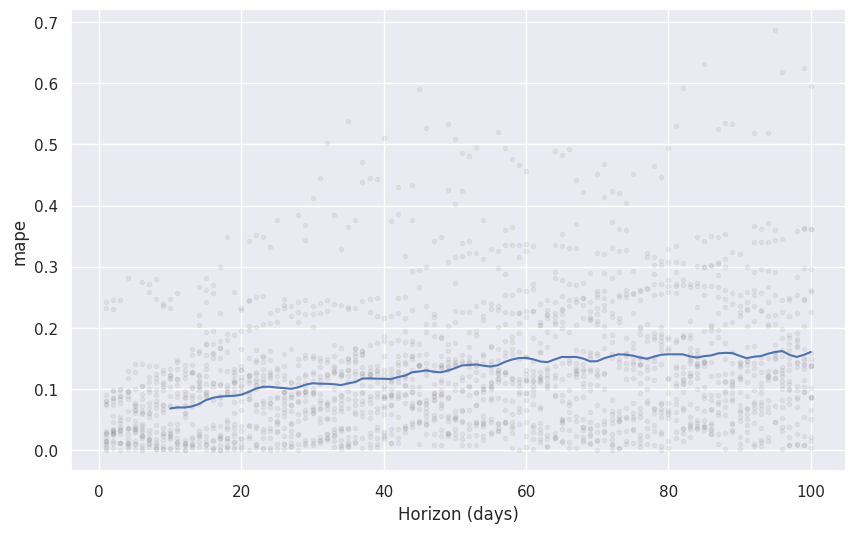

In [58]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

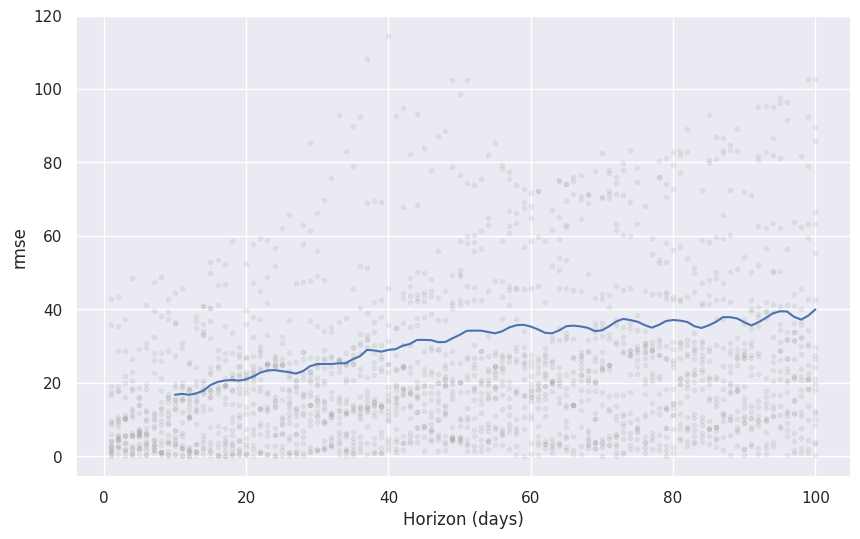

In [59]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [60]:
df_prophet

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [61]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,132.621686,113.649532,145.516905,132.621686,132.621686,-2.165517,-2.165517,-2.165517,0.705479,0.705479,0.705479,-2.870995,-2.870995,-2.870995,0.0,0.0,0.0,130.456169
1,2015-05-28,132.475593,114.329137,145.818459,132.475593,132.475593,-2.500292,-2.500292,-2.500292,0.602978,0.602978,0.602978,-3.103270,-3.103270,-3.103270,0.0,0.0,0.0,129.975301
2,2015-05-29,132.329501,112.810235,144.999453,132.329501,132.329501,-3.032243,-3.032243,-3.032243,0.302443,0.302443,0.302443,-3.334686,-3.334686,-3.334686,0.0,0.0,0.0,129.297257
3,2015-06-01,131.891223,112.464214,143.230173,131.891223,131.891223,-3.849896,-3.849896,-3.849896,0.148986,0.148986,0.148986,-3.998882,-3.998882,-3.998882,0.0,0.0,0.0,128.041327
4,2015-06-02,131.745131,113.269256,143.411696,131.745131,131.745131,-3.652169,-3.652169,-3.652169,0.551342,0.551342,0.551342,-4.203512,-4.203512,-4.203512,0.0,0.0,0.0,128.092962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,418.860892,358.141444,469.116377,361.143968,469.598138,-0.721839,-0.721839,-0.721839,0.551342,0.551342,0.551342,-1.273181,-1.273181,-1.273181,0.0,0.0,0.0,418.139053
1619,2021-05-19,419.167229,356.885790,471.928866,361.286683,470.066695,-0.691448,-0.691448,-0.691448,0.705479,0.705479,0.705479,-1.396927,-1.396927,-1.396927,0.0,0.0,0.0,418.475781
1620,2021-05-20,419.473566,355.778385,474.785014,361.429399,470.620573,-0.939983,-0.939983,-0.939983,0.602978,0.602978,0.602978,-1.542961,-1.542961,-1.542961,0.0,0.0,0.0,418.533583
1621,2021-05-21,419.779903,357.981399,471.116189,361.572114,471.330460,-1.406867,-1.406867,-1.406867,0.302443,0.302443,0.302443,-1.709309,-1.709309,-1.709309,0.0,0.0,0.0,418.373036


# Hyper-tunng Prophet Model parameters


In [70]:
param_grid = {
     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
 }

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

for params in all_params:
     m = Prophet(**params).fit(df_prophet)
     df_cv = cross_validation(m, horizon='100 days', period='50 days', initial='300 days', parallel="processes")
     df_p = performance_metrics(df_cv, rolling_window=1)
     rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/zebt8t9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/9rgpcq_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88370', 'data', 'file=/tmp/tmpwvkabcas/zebt8t9m.json', 'init=/tmp/tmpwvkabcas/9rgpcq_e.json', 'output', 'file=/tmp/tmpwvkabcas/prophet_modelz62fmsm5/prophet_model-20250211075545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 29 forecasts with cutoffs between 2016-04-13 00:00:00 and 2020-02-12 00:00:00
INFO:prophet:Applying in parallel with <conc

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  35.325496
1                     0.001                     0.10  36.208539
2                     0.001                     1.00  44.223975
3                     0.001                    10.00  45.003057
4                     0.010                     0.01  31.593191
5                     0.010                     0.10  31.936756
6                     0.010                     1.00  31.964399
7                     0.010                    10.00  31.702005
8                     0.100                     0.01  30.122071
9                     0.100                     0.10  32.802455
10                    0.100                     1.00  32.629831
11                    0.100                    10.00  32.910630
12                    0.500                     0.01  29.899445
13                    0.500                     0.10  33.803683
14                    0.500             

In [82]:
m = Prophet(**best_params)
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/4y7n52_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/y3pnnqqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75134', 'data', 'file=/tmp/tmpwvkabcas/4y7n52_8.json', 'init=/tmp/tmpwvkabcas/y3pnnqqv.json', 'output', 'file=/tmp/tmpwvkabcas/prophet_modelx9_1dy7w/prophet_model-20250211080926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:09:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 0.01,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 0.01,
               'mode': 'additive',
               'condition_name': None})])

In [84]:
#Build Time Series Forecasting Model
future_price = model.make_future_dataframe(periods = 365, freq = 'D')
future_price

,ds
0,2015-05-27
1,2015-05-28
2,2015-05-29
3,2015-06-01
4,2015-06-02
...,...
1618,2021-05-18
1619,2021-05-19
1620,2021-05-20
1621,2021-05-21


In [85]:
df_prophet.shape

(1258, 2)

In [86]:
future_price.shape

(1623, 1)

In [87]:
prediction = model.predict(future_price)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,145.786250,125.276125,145.757841,145.786250,145.786250,-9.855955,-9.855955,-9.855955,0.359699,0.359699,0.359699,-10.215654,-10.215654,-10.215654,0.0,0.0,0.0,135.930295
1,2015-05-28,145.681361,124.365355,145.396898,145.681361,145.681361,-10.555412,-10.555412,-10.555412,0.141886,0.141886,0.141886,-10.697298,-10.697298,-10.697298,0.0,0.0,0.0,135.125949
2,2015-05-29,145.576471,123.363296,145.004986,145.576471,145.576471,-11.325868,-11.325868,-11.325868,-0.146847,-0.146847,-0.146847,-11.179021,-11.179021,-11.179021,0.0,0.0,0.0,134.250603
3,2015-06-01,145.261803,121.229361,143.117209,145.261803,145.261803,-12.935942,-12.935942,-12.935942,-0.362506,-0.362506,-0.362506,-12.573436,-12.573436,-12.573436,0.0,0.0,0.0,132.325861
4,2015-06-02,145.156913,121.161132,142.034111,145.156913,145.156913,-12.967464,-12.967464,-12.967464,0.038642,0.038642,0.038642,-13.006106,-13.006106,-13.006106,0.0,0.0,0.0,132.189449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,400.331487,-2.748828,745.224147,4.790217,750.661728,-6.824335,-6.824335,-6.824335,0.038642,0.038642,0.038642,-6.862977,-6.862977,-6.862977,0.0,0.0,0.0,393.507152
1619,2021-05-19,400.604393,-8.686584,739.641041,3.693821,752.489075,-6.780352,-6.780352,-6.780352,0.359699,0.359699,0.359699,-7.140051,-7.140051,-7.140051,0.0,0.0,0.0,393.824041
1620,2021-05-20,400.877299,-7.120249,742.542746,2.597425,753.600100,-7.314510,-7.314510,-7.314510,0.141886,0.141886,0.141886,-7.456396,-7.456396,-7.456396,0.0,0.0,0.0,393.562789
1621,2021-05-21,401.150206,-10.997300,748.764048,0.656344,756.262010,-7.956011,-7.956011,-7.956011,-0.146847,-0.146847,-0.146847,-7.809164,-7.809164,-7.809164,0.0,0.0,0.0,393.194195


In [88]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [89]:
prediction[['ds', 'yhat_lower', 'yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
1603,2021-05-03,14.726824,717.025427,388.865311
1604,2021-05-04,19.705568,716.207862,389.690351
1605,2021-05-05,10.151319,721.026192,390.434516
1606,2021-05-06,20.381399,720.312118,390.634293
1607,2021-05-07,7.457917,723.174092,390.752706
1608,2021-05-08,6.928262,723.881651,391.299351
1609,2021-05-09,7.115599,729.384136,391.623653
1610,2021-05-10,14.070029,726.987511,391.646386
1611,2021-05-11,9.546308,735.891315,392.364349
1612,2021-05-12,4.395150,729.195371,392.968824


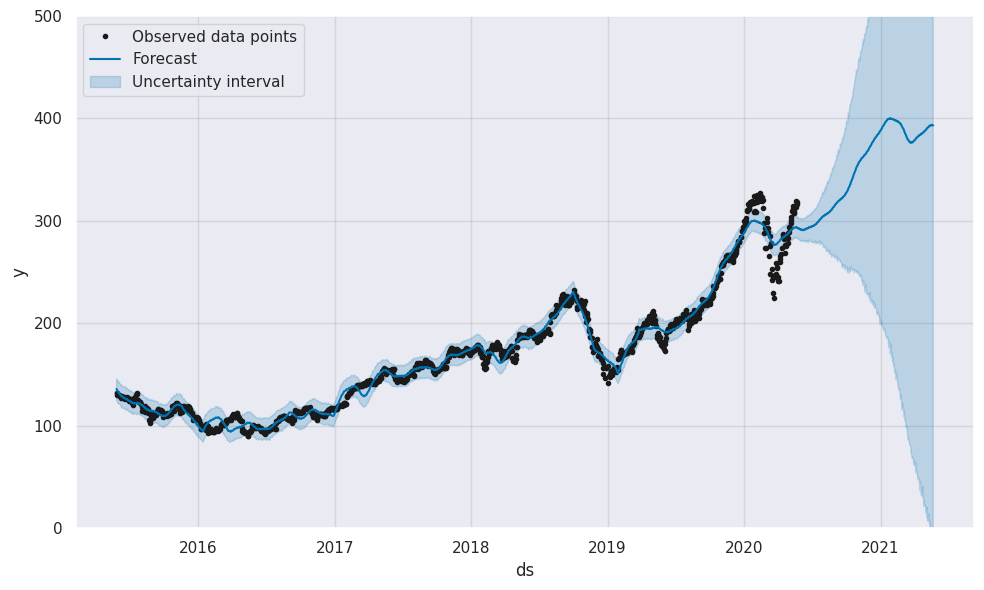

In [95]:
fig = model.plot(prediction, include_legend = True)
ax = fig.gca()
ax.set_ylim([0, 500])
plt.show()

# we can see better accuracy in model performance now.

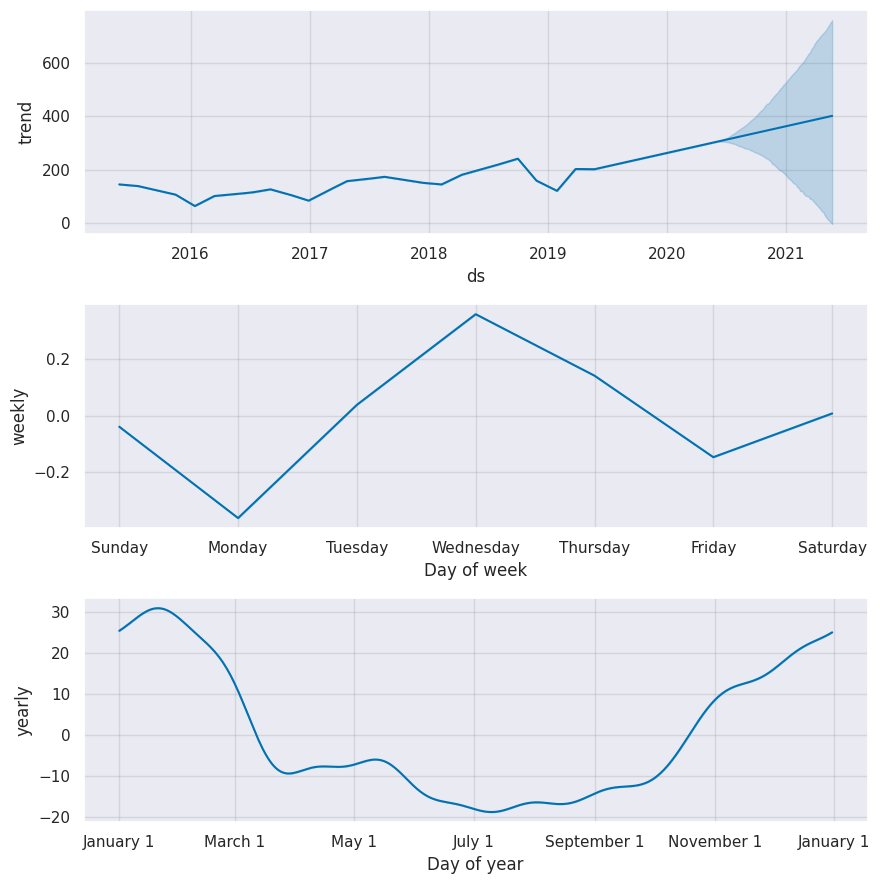

In [96]:
model.plot_components(prediction)
plt.show()

In [97]:
# cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '100 days', period = '50 days', initial = '300 days')

INFO:prophet:Making 29 forecasts with cutoffs between 2016-04-13 00:00:00 and 2020-02-12 00:00:00


  0%|          | 0/29 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/j5axl1je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/p_wqrcgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48465', 'data', 'file=/tmp/tmpwvkabcas/j5axl1je.json', 'init=/tmp/tmpwvkabcas/p_wqrcgw.json', 'output', 'file=/tmp/tmpwvkabcas/prophet_modeliu7sobze/prophet_model-20250211081441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/1paoz0c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvkabcas/ua8cx6t4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [98]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,89.207977,9.444997,7.333206,0.040904,0.035389,0.040903,0.280000
1,11 days,94.503238,9.721278,7.651209,0.042637,0.037757,0.042693,0.265000
2,12 days,105.338064,10.263433,8.026306,0.044876,0.041403,0.044945,0.242143
3,13 days,130.108307,11.406503,8.726560,0.048575,0.046200,0.048540,0.231316
4,14 days,148.931820,12.203763,9.274836,0.051296,0.048086,0.051159,0.226250
...,...,...,...,...,...,...,...,...
86,96 days,1675.467158,40.932471,29.092848,0.152573,0.126070,0.152040,0.783750
87,97 days,1569.153528,39.612543,28.457494,0.150405,0.130610,0.149834,0.800000
88,98 days,1525.046129,39.051839,28.621910,0.151527,0.131902,0.150573,0.811053
89,99 days,1606.806214,40.084987,29.389164,0.154446,0.134003,0.153132,0.812143


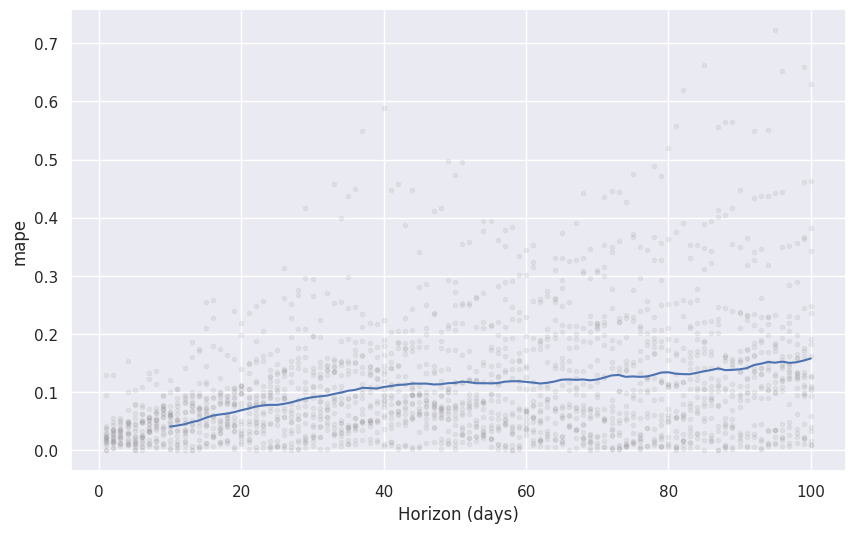

In [99]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

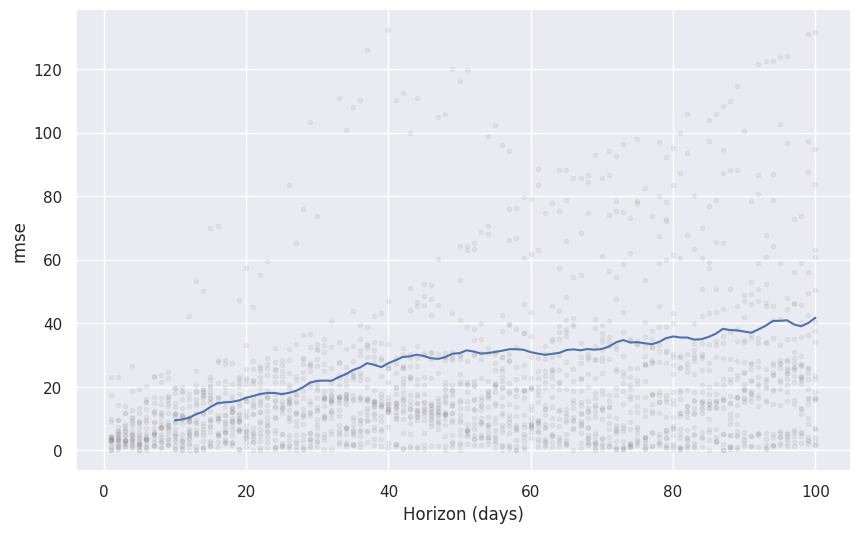

In [100]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [101]:
df_prophet

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [102]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,145.786250,125.276125,145.757841,145.786250,145.786250,-9.855955,-9.855955,-9.855955,0.359699,0.359699,0.359699,-10.215654,-10.215654,-10.215654,0.0,0.0,0.0,135.930295
1,2015-05-28,145.681361,124.365355,145.396898,145.681361,145.681361,-10.555412,-10.555412,-10.555412,0.141886,0.141886,0.141886,-10.697298,-10.697298,-10.697298,0.0,0.0,0.0,135.125949
2,2015-05-29,145.576471,123.363296,145.004986,145.576471,145.576471,-11.325868,-11.325868,-11.325868,-0.146847,-0.146847,-0.146847,-11.179021,-11.179021,-11.179021,0.0,0.0,0.0,134.250603
3,2015-06-01,145.261803,121.229361,143.117209,145.261803,145.261803,-12.935942,-12.935942,-12.935942,-0.362506,-0.362506,-0.362506,-12.573436,-12.573436,-12.573436,0.0,0.0,0.0,132.325861
4,2015-06-02,145.156913,121.161132,142.034111,145.156913,145.156913,-12.967464,-12.967464,-12.967464,0.038642,0.038642,0.038642,-13.006106,-13.006106,-13.006106,0.0,0.0,0.0,132.189449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,400.331487,-2.748828,745.224147,4.790217,750.661728,-6.824335,-6.824335,-6.824335,0.038642,0.038642,0.038642,-6.862977,-6.862977,-6.862977,0.0,0.0,0.0,393.507152
1619,2021-05-19,400.604393,-8.686584,739.641041,3.693821,752.489075,-6.780352,-6.780352,-6.780352,0.359699,0.359699,0.359699,-7.140051,-7.140051,-7.140051,0.0,0.0,0.0,393.824041
1620,2021-05-20,400.877299,-7.120249,742.542746,2.597425,753.600100,-7.314510,-7.314510,-7.314510,0.141886,0.141886,0.141886,-7.456396,-7.456396,-7.456396,0.0,0.0,0.0,393.562789
1621,2021-05-21,401.150206,-10.997300,748.764048,0.656344,756.262010,-7.956011,-7.956011,-7.956011,-0.146847,-0.146847,-0.146847,-7.809164,-7.809164,-7.809164,0.0,0.0,0.0,393.194195
